# **Introdução à biblioteca Sidrapy : Inflação Acumulada 12 meses**

Autor: [J. Victor]([https://medium.com/@J.Victor_S](https://medium.com/@J.Victor_S))
## SIDRA
[![sidra](https://www.insper.edu.br/wp-content/uploads/2019/12/Pesquisa-Trimestral-do-Leite-%E2%80%93-PTL-IBGE-logo.png)](https://www.insper.edu.br/wp-content/uploads/2019/12/Pesquisa-Trimestral-do-Leite-%E2%80%93-PTL-IBGE-logo.png)
O [SIDRA (Sistema IBGE de Recuperação Automática ](sidra.ibge.gov.br) é uma plataforma criada pelo IBGE com objetivo de oferecer uma maneira rápida e fácil de consultar as pesquisas realizadas pelo instituto por meio de API´s simplificadas.

## SIDRApy
O sidrapy é uma biblioteca para python que oferece acesso direto para a [ API SIDRA ]([http://api.sidra.ibge.gov.br/](http://api.sidra.ibge.gov.br/)), e consequentemente, permite a extração e importação do dados diretamente para o python.




In [1]:
#Importando os principais pacotes
#!pip install -U sidrapy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sidrapy as sdp



In [25]:
#Request da tab bruta
tab_bruta = sdp.get_table(table_code=1737,
                     territorial_level='1',
                     ibge_territorial_code='all',
                     variable='2265',
                     period='last%20325',
                     )

In [26]:
#visualizando o dataframe

tab_bruta.head(5)

,NC,NN,MC,MN,V,D1C,D1N,D2C,D2N,D3C,D3N
0,Nível Territorial (Código),Nível Territorial,Unidade de Medida (Código),Unidade de Medida,Valor,Brasil (Código),Brasil,Mês (Código),Mês,Variável (Código),Variável
1,1,Brasil,2,%,21.97,1,Brasil,199601,janeiro 1996,2265,IPCA - Variação acumulada em 12 meses
2,1,Brasil,2,%,21.99,1,Brasil,199602,fevereiro 1996,2265,IPCA - Variação acumulada em 12 meses
3,1,Brasil,2,%,20.55,1,Brasil,199603,março 1996,2265,IPCA - Variação acumulada em 12 meses
4,1,Brasil,2,%,19.17,1,Brasil,199604,abril 1996,2265,IPCA - Variação acumulada em 12 meses


In [27]:
#Verificando os dados da tabela
print(tab_bruta.isnull().any())
tab_bruta.info()

NC     False
NN     False
MC     False
MN     False
V      False
D1C    False
D1N    False
D2C    False
D2N    False
D3C    False
D3N    False
dtype: bool
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326 entries, 0 to 325
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NC      326 non-null    object
 1   NN      326 non-null    object
 2   MC      326 non-null    object
 3   MN      326 non-null    object
 4   V       326 non-null    object
 5   D1C     326 non-null    object
 6   D1N     326 non-null    object
 7   D2C     326 non-null    object
 8   D2N     326 non-null    object
 9   D3C     326 non-null    object
 10  D3N     326 non-null    object
dtypes: object(11)
memory usage: 28.1+ KB


In [28]:
#limpeza de dados

#Substitui o nome das colunas pelo primeiro dado de cada

tab_bruta.columns = tab_bruta.iloc[0]

#Remove a primeira linha
tab_bruta = tab_bruta.iloc[1:, :]

#Verifica o tipo de dado da variável valor:
print(tab_bruta['Valor'].dtype)


object


In [29]:
#Visualizando a tabela
tab_bruta.head(5)

,Nível Territorial (Código),Nível Territorial,Unidade de Medida (Código),Unidade de Medida,Valor,Brasil (Código),Brasil,Mês (Código),Mês,Variável (Código),Variável
1,1,Brasil,2,%,21.97,1,Brasil,199601,janeiro 1996,2265,IPCA - Variação acumulada em 12 meses
2,1,Brasil,2,%,21.99,1,Brasil,199602,fevereiro 1996,2265,IPCA - Variação acumulada em 12 meses
3,1,Brasil,2,%,20.55,1,Brasil,199603,março 1996,2265,IPCA - Variação acumulada em 12 meses
4,1,Brasil,2,%,19.17,1,Brasil,199604,abril 1996,2265,IPCA - Variação acumulada em 12 meses
5,1,Brasil,2,%,17.49,1,Brasil,199605,maio 1996,2265,IPCA - Variação acumulada em 12 meses


In [30]:
#Altera o tipo para float da coluna "Valor"

#ab_bruta['Valor'] = tab_bruta['Valor'].astype(float)
tab_bruta.loc[:, 'Valor'] = tab_bruta['Valor'].astype(float)
#Verificando o resultado
print(tab_bruta['Valor'].dtype)

tab_bruta.head(2)


float64


,Nível Territorial (Código),Nível Territorial,Unidade de Medida (Código),Unidade de Medida,Valor,Brasil (Código),Brasil,Mês (Código),Mês,Variável (Código),Variável
1,1,Brasil,2,%,21.97,1,Brasil,199601,janeiro 1996,2265,IPCA - Variação acumulada em 12 meses
2,1,Brasil,2,%,21.99,1,Brasil,199602,fevereiro 1996,2265,IPCA - Variação acumulada em 12 meses


In [31]:
#Fazendo uma cópia da tabela
df_clone = tab_bruta.copy()

#Usando a função 'to_datetime' para converter para o formato da data
import locale
locale.setlocale(locale.LC_ALL, 'pt_BR.utf8')

df_clone['Mês'] = pd.to_datetime(df_clone['Mês'],
                             format = '%B %Y')



In [33]:
df_clone.head(4)

,Nível Territorial (Código),Nível Territorial,Unidade de Medida (Código),Unidade de Medida,Valor,Brasil (Código),Brasil,Mês (Código),Mês,Variável (Código),Variável
1,1,Brasil,2,%,21.97,1,Brasil,199601,1996-01-01,2265,IPCA - Variação acumulada em 12 meses
2,1,Brasil,2,%,21.99,1,Brasil,199602,1996-02-01,2265,IPCA - Variação acumulada em 12 meses
3,1,Brasil,2,%,20.55,1,Brasil,199603,1996-03-01,2265,IPCA - Variação acumulada em 12 meses
4,1,Brasil,2,%,19.17,1,Brasil,199604,1996-04-01,2265,IPCA - Variação acumulada em 12 meses


In [71]:
#Removendo as colunas desnecessárias da tabela

#Lista de variáveis que queremos
listav = ['Valor', 'Mês']

#Dataframe Final

df_final = df_clone.loc[:, listav]

df_final.head(325)


,Valor,Mês
1,21.97,1996-01-01
2,21.99,1996-02-01
3,20.55,1996-03-01
4,19.17,1996-04-01
5,17.49,1996-05-01
...,...,...
321,7.17,2022-09-01
322,6.47,2022-10-01
323,5.90,2022-11-01
324,5.79,2022-12-01


In [64]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 1 to 325
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Valor   325 non-null    float64       
 1   Mês     325 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.2 KB


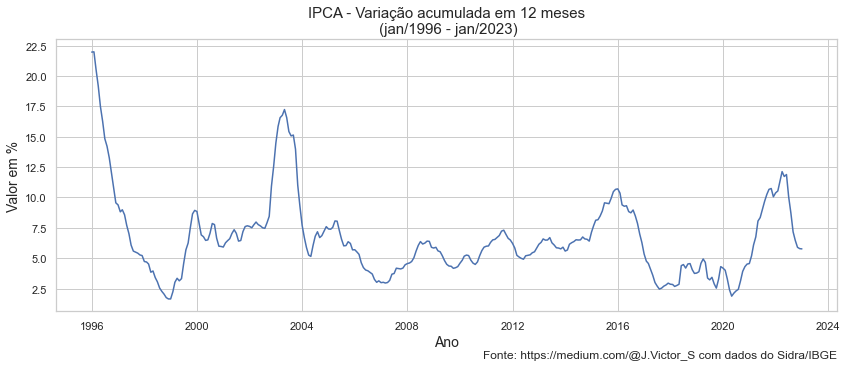

In [107]:
#Plotando gráfico
sns.set_theme(style = 'whitegrid',
             context = 'notebook')
fig, ax = plt.subplots(figsize=(14,5))
sns.lineplot(data=df_final, x='Mês', y='Valor')
ax.set_title('IPCA - Variação acumulada em 12 meses\n (jan/1996 - jan/2023)',
             fontdict={'size' : 15})
ax.xaxis.set_label_text('Ano',
                       fontdict={'size' : 14})
ax.yaxis.set_label_text('Valor em %',
                       fontdict={'size' : 14})

#Fonte dos dados

plt.annotate('Fonte: https://medium.com/@J.Victor_S com dados do Sidra/IBGE',
            xy = (1.0, -0.16),
            xycoords = 'axes fraction',
            ha = 'right',
            va = 'center',
            fontsize = '12')
plt.show()